In [1]:
!pip install -U "spacy[transformers]"
!python -m spacy download en_core_web_trf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 795.8/795.8 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.2/33.2 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 142.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 118.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: weasel
    Found existing installation: weasel 0.4.1
    Uninstalling weasel-0.4.1:
      Successfully uninstalled weasel-0.4.1
  Attempting uninstall: transformers
    F

In [2]:
import spacy
import pandas as pd

# Load English model
nlp = spacy.load("en_core_web_trf")

# Load dataset
df = pd.read_csv("/content/imdb_top_1000.csv")


#Clean and Prepare the Data

In [3]:
df['Gross'] = (
    df['Gross']
    .astype(str)
    .str.replace(',', '')
    .str.replace('$', '', regex=False)
    .replace('nan', None)
    .astype(float)
)

In [4]:
df['Gross'] .head()

,Gross
0,28341469.0
1,134966411.0
2,534858444.0
3,57300000.0
4,4360000.0


In [5]:
df = df.dropna(subset=['Gross', 'Overview'])


In [6]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

#Apply NER to the Overviews

In [7]:
def extract_named_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'GPE']]
    return entities

df['Named_Entities'] = df['Overview'].apply(lambda x: extract_named_entities(str(x)))
df.head(3)[['Series_Title', 'Named_Entities', 'Overview']]


,Series_Title,Named_Entities,Overview
0,The Shawshank Redemption,[],Two imprisoned men bond over a number of years...
1,The Godfather,[],An organized crime dynasty's aging patriarch t...
2,The Dark Knight,"[Joker, Gotham, Batman]",When the menace known as the Joker wreaks havo...


#Split into High vs. Low Grossing Movies

In [8]:
median_gross = df['Gross'].median()

high_gross = df[df['Gross'] >= median_gross]
low_gross  = df[df['Gross'] < median_gross]


#Count Entity Frequencies

In [9]:
from collections import Counter
import itertools

def get_top_entities(data, n=15):
    all_entities = list(itertools.chain.from_iterable(data['Named_Entities']))
    return pd.DataFrame(Counter(all_entities).most_common(n), columns=['Entity', 'Count'])

top_high = get_top_entities(high_gross)
top_low  = get_top_entities(low_gross)

print("Top Entities in High-Grossing Films:")
display(top_high)

print("\Top Entities in Low-Grossing Films:")
display(top_low)


Top Entities in High-Grossing Films:


<>:14: SyntaxWarning: invalid escape sequence '\T'
<>:14: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-1754813395.py:14: SyntaxWarning: invalid escape sequence '\T'
  print("\Top Entities in Low-Grossing Films:")


,Entity,Count
0,U.S.,10
1,Los Angeles,8
2,New York City,5
3,Hollywood,5
4,CIA,5
5,Woody,4
6,FBI,4
7,Joker,3
8,Batman,3
9,Sauron,3


\Top Entities in Low-Grossing Films:


,Entity,Count
0,New York City,6
1,India,5
2,Hollywood,5
3,Italy,4
4,the United States,4
5,Jesse,3
6,Vienna,3
7,Rome,3
8,New York,3
9,Tokyo,3


# beautify plot

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Global style settings
sns.set_theme(style="whitegrid", context="talk", font_scale=1.0)
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.edgecolor"] = "#333333"
plt.rcParams["axes.labelcolor"] = "#333333"
plt.rcParams["xtick.color"] = "#333333"
plt.rcParams["ytick.color"] = "#333333"


/tmp/ipython-input-2649854723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


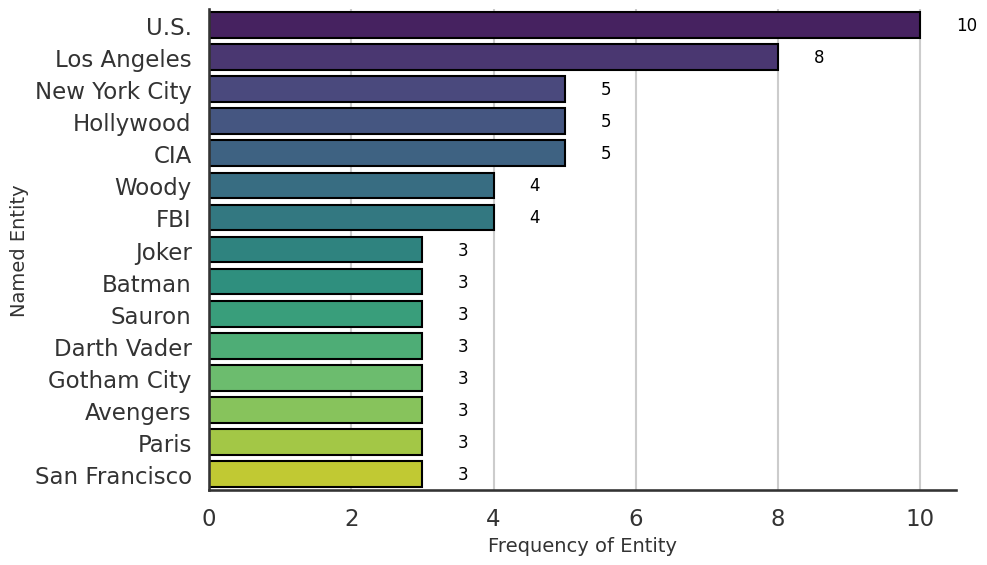

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(
    y='Entity',
    x='Count',
    data=top_high,
    palette='viridis',
    edgecolor='black'
)

# plt.title("Top Named Entities in High-Grossing Films", fontsize=15, weight='bold', pad=15)
plt.xlabel("Frequency of Entity", fontsize=14)
plt.ylabel("Named Entity", fontsize=14)
plt.tight_layout()

for i, (count) in enumerate(top_high['Count']):
    plt.text(count + 0.5, i, f"{count}", va='center', fontsize=12, color='black')

plt.show()


/tmp/ipython-input-769383797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


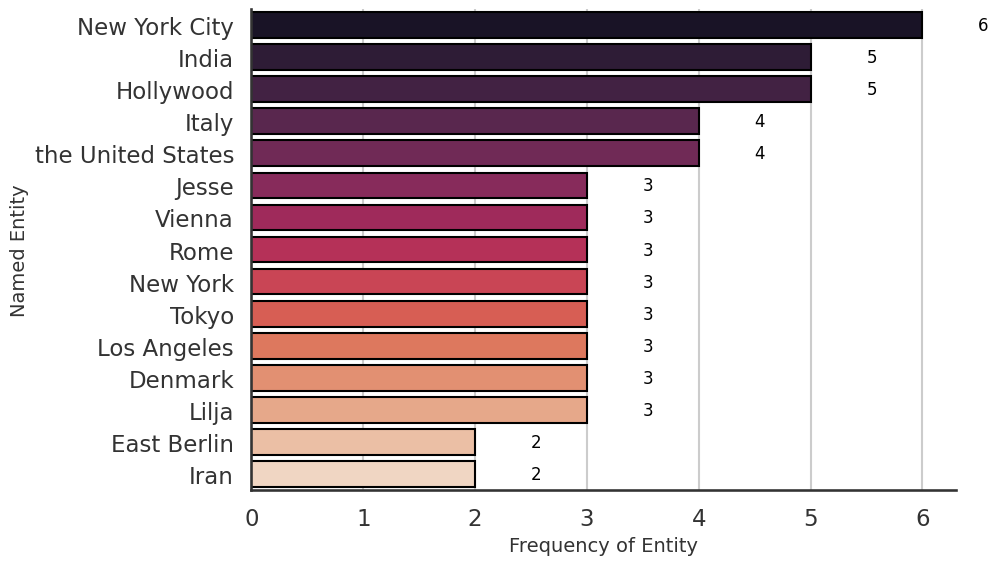

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(
    y='Entity',
    x='Count',
    data=top_low,
    palette='rocket',
    edgecolor='black'
)

# plt.title("Top Named Entities in Low-Grossing Films", fontsize=15, weight='bold', pad=15)
plt.xlabel("Frequency of Entity", fontsize=14)
plt.ylabel("Named Entity", fontsize=14)
plt.tight_layout()

for i, (count) in enumerate(top_low['Count']):
    plt.text(count + 0.5, i, f"{count}", va='center', fontsize=12, color='black')

plt.show()


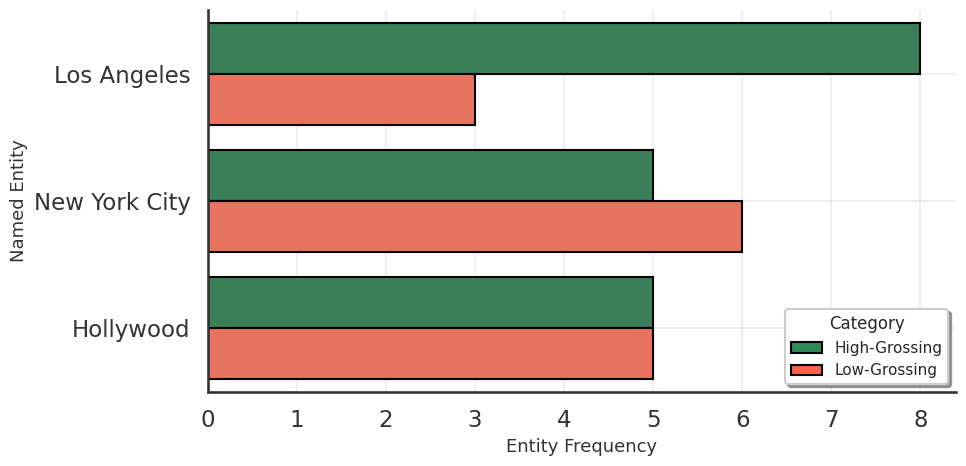

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_common = pd.merge(top_high, top_low, on='Entity', how='inner', suffixes=('_High', '_Low'))

# Calculate total frequency and keep top 3 shared entities
merged_common['Total'] = merged_common['Count_High'] + merged_common['Count_Low']
top3_common = merged_common.sort_values('Total', ascending=False).head(3)

# Melt for plotting
merged_melted = top3_common.melt(
    id_vars='Entity',
    value_vars=['Count_High', 'Count_Low'],
    var_name='Group',
    value_name='Count'
)

colors = {
    'Count_High': '#2E8B57',   #  for High-Grossing
    'Count_Low':  '#FF6347'    #  for Low-Grossing
}


plt.figure(figsize=(10,5))
sns.barplot(
    data=merged_melted,
    x='Count',
    y='Entity',
    hue='Group',
    palette=colors,
    edgecolor='black'
)

# plt.title("Some Common Entities in High vs Low Grossing Films", fontsize=15, weight='bold', pad=15)
plt.xlabel("Entity Frequency", fontsize=13)
plt.ylabel("Named Entity", fontsize=13)

from matplotlib.patches import Patch
legend_handles = [
    Patch(facecolor='#2E8B57', edgecolor='black', label='High-Grossing'),
    Patch(facecolor='#FF6347', edgecolor='black', label='Low-Grossing')
]
plt.legend(
    handles=legend_handles,
    title="Category",
    loc='lower right',
    fontsize=11,
    title_fontsize=12,
    frameon=True,
    fancybox=True,
    shadow=True
)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
